In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("C:\\Users\\subal\\OneDrive\\Desktop\\Documents\\Project\\machine learning\\Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [4]:
#convert the Date column into Datetime data type

data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


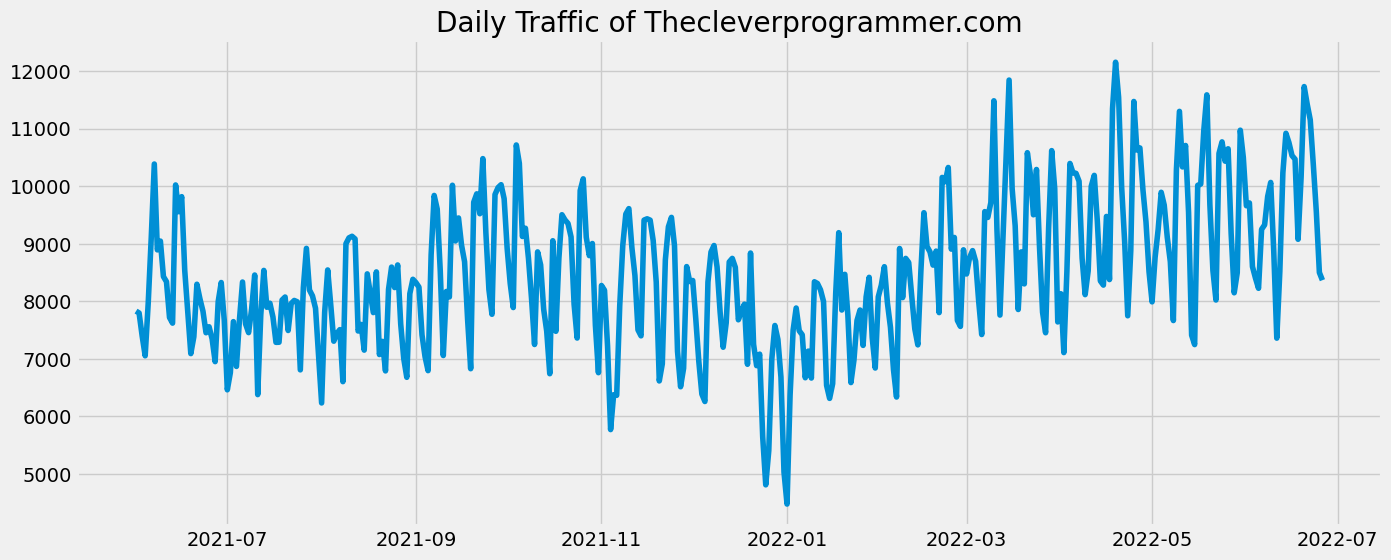

In [10]:
#daily traffic of the website
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

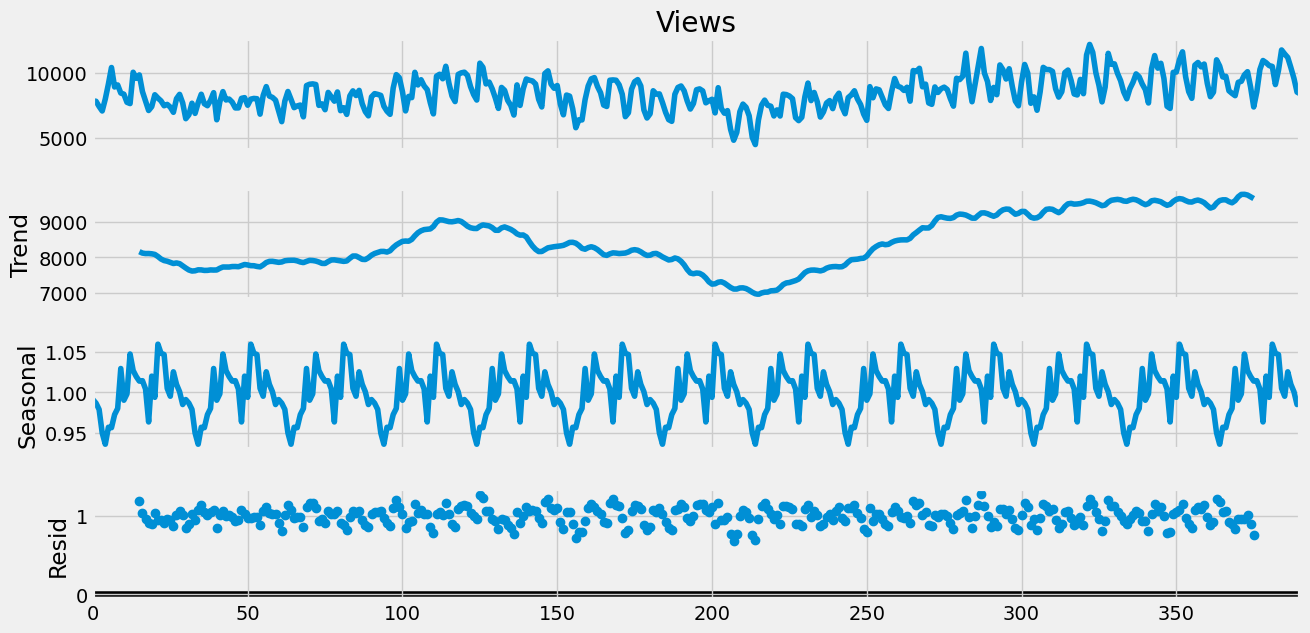

In [16]:
# dataset is stationary or seasonal

result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 7)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

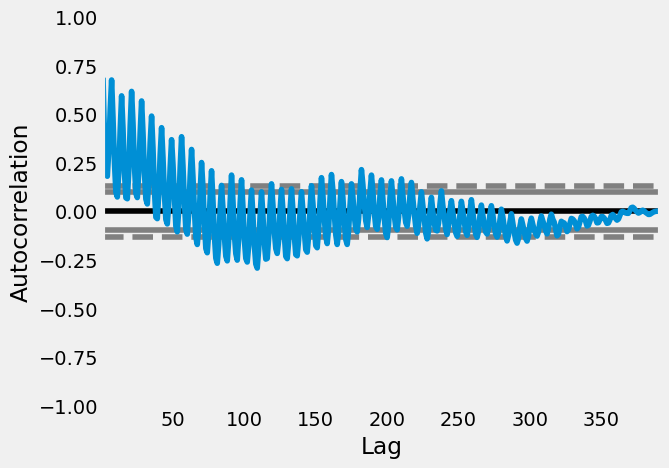

In [18]:
pd.plotting.autocorrelation_plot(data["Views"])

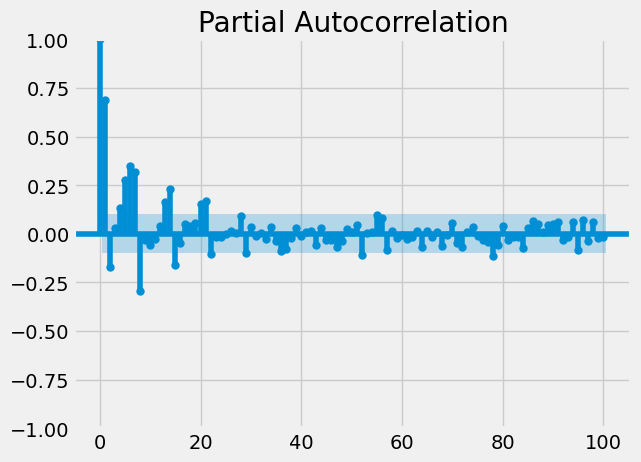

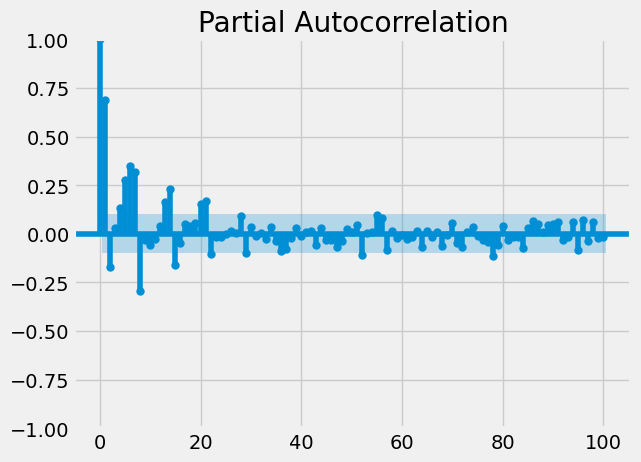

In [20]:
plot_pacf(data["Views"], lags = 100)

In [22]:
#training a SARIMA model for website traffic forecasting

p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\subal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\subal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.983
Date:                            Thu, 22 Aug 2024   AIC                           6227.965
Time:                                    12:15:59   BIC                           6286.988
Sample:                                         0   HQIC                          6251.390
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7711      0.130      5.912      0.000       0.515       1.027
ar.L2         -0.7922      0.136   

In [24]:
#forecasting traffic on the website for the next 50 days

predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9880.838901
392    10792.462878
393    10725.893815
394     9850.393959
395     8787.847950
396     8246.789944
397     8939.941902
398     9713.149908
399    10303.435796
400    10596.363572
401     9883.096350
402     9335.096116
403     9005.092190
404     9073.126666
405    10495.838665
406    10999.148557
407    10916.718768
408    10077.443075
409     9410.730606
410     8612.585517
411     9183.807099
412    10351.570418
413    10645.069469
414    10819.056487
415    10255.757751
416     9399.644138
417     8965.227748
418     9157.925179
419     9931.110738
420    10276.651627
421    10745.877733
422     9899.432872
423     9497.470938
424     8981.802592
425     8865.645363
426    10195.196923
427    10901.121140
428    10925.220661
429    10362.757069
430     9401.360354
431     8682.128113
432     8738.291852
433    10110.581874
434    10576.259906
435    10887.539571
436    10427.974221
437     9304.818481
438     9158.031224
439     9381.938660
440    10340.778035


<Axes: >

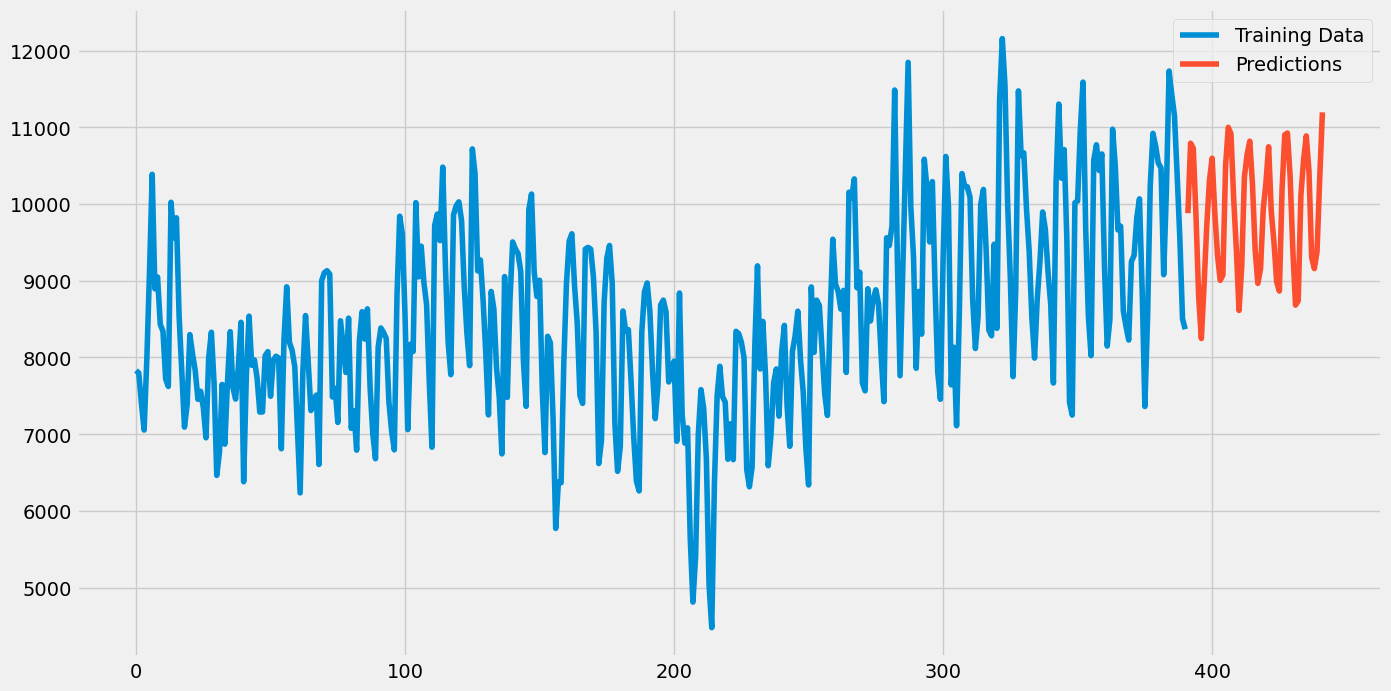

In [26]:
#ploting the predictions

data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 8))
predictions.plot(legend=True, label="Predictions")